# **Multi Layer Perceptron or MLP**

In this code, we have made a model based on the multi layer percceptron of MLP which is based on Deep Neural Networks. 

Importing all the necessary packages and libraries for the model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Embedding, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Nadam,Ftrl,SGD,Adadelta,Adamax,Adagrad,RMSprop
from tensorflow.keras.utils import Sequence
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.initializers import RandomUniform, lecun_uniform,he_uniform
import math

Importing pandas and reading the data from the csv file

In [ ]:
import pandas as pd
col_list = ["U_ID", "P_ID", "RATING"]
dataset = pd.read_csv('rating.csv',usecols=col_list, sep='\t',dtype='int')

This block and the next block of code deals with extracting the unique User IDs from the dataset and mapping them with their index number and storing it in a dictionary

In [ ]:
#To get the unique user ids from dataset and feeding it to the dictionary
user_ids = dataset['U_ID'].values
unique_ids = np.unique(user_ids)
id_dict = {id: counter for counter, id in enumerate(unique_ids)}
#enumerate(unique_ids) : assigning unique IDs to each element in the dataset
dataset['U_ID'] = dataset['U_ID'].apply(lambda x: id_dict[x])

In [ ]:
#To get the unique product ids from dataset and storing it as array. 
product_ids = dataset['P_ID'].values
unique_ids = np.unique(product_ids)
#create a dictionary of users with key value from 0 to #users and  enumerate the product ids
id_dict = {id: counter for counter, id in enumerate(unique_ids)}
dataset['P_ID'] = dataset['P_ID'].apply(lambda x: id_dict[x])

Taking the latent factors for matrix factorization as 20. Also taking the number of unique users and products

In [ ]:
# getting the total number of users and movies from the dataset
n_users = len(dataset.U_ID.unique())
n_movies = len(dataset.P_ID.unique())
n_latent_factors=20

**Movie input and embedding** : take movie_input which is a single number, representing the movie ID and turn it into vector with the keras Embedding layer.

**User input and embedding** : take user_input which is a single number, representing the user ID and turn it into vector with the keras Embedding layer.

In [ ]:
movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies, n_latent_factors, 
                                          embeddings_initializer="uniform", 
                                          embeddings_regularizer=l2(1e-6), 
                                          embeddings_constraint='NonNeg',
                                          name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
 
user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = keras.layers.Embedding(n_users, n_latent_factors, 
                                          embeddings_initializer="uniform", 
                                          embeddings_regularizer=l2(1e-6), 
                                          embeddings_constraint='NonNeg',
                                          name='User-Embedding')(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)


Movie and user input is concatenated.

**MLP with 6 layers** : putting them through a simple dense neural network, with dropout and batch normalization. Finally take the result with softmax, and compile it all.

In [ ]:
#concatenating movie and user input and embedding
concat = keras.layers.concatenate([movie_vec, user_vec])
#mlp with 6 layers
mlp = concat
for i in range(6,-1,-1):
    if i == 0:
      mlp = Dense(8**i, activation='softmax', kernel_initializer='lecun_uniform',
                  name="output")(mlp)
    else:
      mlp = Dense(8*2**i, activation='relu', kernel_initializer='he_uniform')(mlp)
      if i > 5:
        mlp = BatchNormalization()(mlp)
        mlp = Dropout(0.05)(mlp)
mlp
model = Model(inputs=[user_input, movie_input], outputs=[mlp])
model.compile('sgd', loss='mean_squared_error', metrics=['mae', 'mse'])

**Importing train_test_split from sklearn and splitting data arrays into two subsets**: for training data and for testing data.

The model is fit and trained here.

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
history = model.fit([train.U_ID, train.P_ID], train.RATING, epochs=10, verbose=1)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


7103/7103 [==============================] - 231s 32ms/step - loss: 11.1252 - mae: 3.1627 - mse: 11.1250
Epoch 2/10
7103/7103 [==============================] - 233s 33ms/step - loss: 11.1252 - mae: 3.1627 - mse: 11.1250
Epoch 3/10
7103/7103 [==============================] - 220s 31ms/step - loss: 11.1252 - mae: 3.1627 - mse: 11.1250
Epoch 4/10
7103/7103 [==============================] - 218s 31ms/step - loss: 11.1252 - mae: 3.1627 - mse: 11.1250
Epoch 5/10
7103/7103 [==============================] - 217s 31ms/step - loss: 11.1252 - mae: 3.1627 - mse: 11.1250
Epoch 6/10
7103/7103 [==============================] - 214s 30ms/step - loss: 11.1252 - mae: 3.1627 - mse: 11.1250
Epoch 7/10
7103/7103 [==============================] - 211s 30ms/step - loss: 11.1252 - mae: 3.1627 - mse: 11.1250
Epoch 8/10
7103/7103 [==============================] - 216s 30ms/step - loss: 11.1252 - mae: 3.1627 - mse: 11.1250
Epoch 9/10
7103/7103 [==============================] - 214s 30ms/step - loss: 11.1

Gives the summary of the model

In [ ]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
User (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 20)        2102280     Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 20)        147500      User[0][0]                       
_______________________________________________________________________________________

Importing plot_model from keras and plotting the model

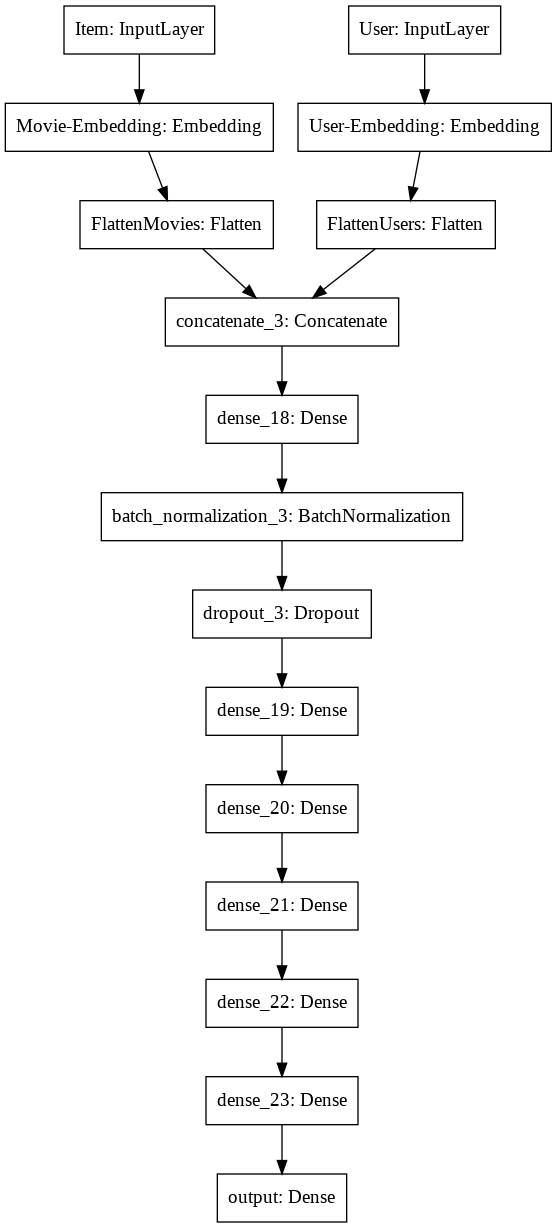

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
    model, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

To evaluate the test portion of the dataset and gives the loss in terms of mae and mse.

In [ ]:
results = model.evaluate([test.U_ID,test.P_ID],test.RATING, batch_size=1)

56818/56818 [==============================] - 308s 5ms/step - loss: 11.0873 - mae: 3.1546 - mse: 11.0872


Retrieves a layer based on either its name (unique) or index.

In [ ]:
#get_weights() Returns the current weights of the layer.
product_embedding_learnt = model.get_layer(name='Movie-Embedding').get_weights()[0]

In [ ]:
user_embedding_learnt = model.get_layer(name='User-Embedding').get_weights()[0]

**Param user_id**: The unique U_ID

**Param number_of_products**: (default = 5), The number of predictions to choose based on relevancy

In [ ]:
def recommend(user_id, number_of_products=5):
  products = user_embedding_learnt[user_id]@product_embedding_learnt.T
  mids = np.argpartition(products, -number_of_products)[-number_of_products:]
  return mids

Displaying recommendations

In [ ]:
recommend(user_id=1)

array([ 4188, 81597, 64774, 67832, 69915])